<a href="https://colab.research.google.com/github/rohithub55/airbnb-analysis/blob/main/airbnb_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIRBNB ANALYSIS

#  Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.


# This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.

In [6]:
#Let's fuel up the rocket to launch...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px

# Mount the google drive.

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Let's load the fuel (Dataset)

In [8]:
#creating directory path
dir_path='/content/drive/My Drive/Dataset'

In [9]:
#read dataset and naming it as airbnb data frame
airbnb_df=pd.read_csv("/content/drive/MyDrive/Airbnb/Copy of Airbnb NYC 2019.csv")

#Let's study the dataset we have...


In [10]:
# Let's check all the columns we have...
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [11]:
# Check the head
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [12]:
#Let's find out the all null values in dataset
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# It's time to deal with all missing values

In [13]:
# Let's operate on missing values
airbnb_df['name'].fillna('unknown',inplace=True)
airbnb_df['host_name'].fillna('no_name',inplace=True)
airbnb_df.reviews_per_month.fillna(0, inplace=True)

#Let's check weather the operation is successful or not...

In [14]:
airbnb_df[['host_name','name','reviews_per_month']].isnull().values.any()
# Congratulations the operation is successful...

False

# Now it's time to drop the unwanted columns..

In [15]:
airbnb_df= airbnb_df.drop(['last_review'],axis=1)

In [16]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48895 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

#we have dropped the last_review column...

In [17]:
#avg price for different type of room type
avg_price=airbnb_df.groupby('room_type')['price'].median().reset_index()
#Looks like there is no $ symbol for price so, let's apply $ sign to price
avg_price['price']=avg_price['price'].apply(lambda x:"{0:1.0f}$".format(x))
avg_price

,room_type,price
0,Entire home/apt,160$
1,Private room,70$
2,Shared room,45$


#Successfully we have applied $ sign for all Prices.


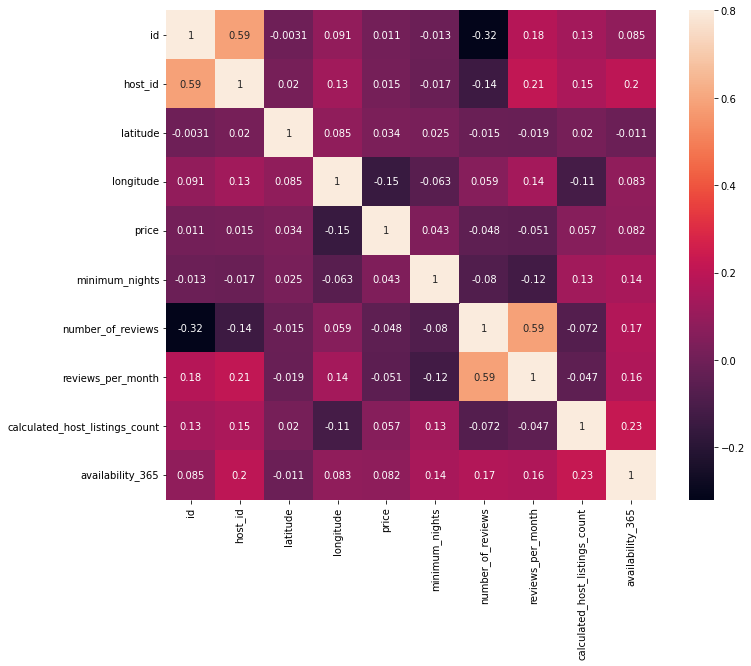

In [18]:
#correlation matrix
corrmat = airbnb_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,annot=True);

#As we see above Histogram there is no perfect corelation is given but then also we can get an overview.

In [19]:
#finding avg price for different types of room.
px.bar(data_frame=avg_price,x='room_type',y='price',color='room_type',title='Avg price for each type of room(Room type vs Price)')

# By looking at above bar graph we get a clear idea of average prices for different room types.

In [30]:
#Neighbourhoods in NYC with respect to average price/day of Airbnb listings:
df_ngrp= airbnb_df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
188,Staten Island,Fort Wadsworth,800.000000
121,Manhattan,Tribeca,490.638418
88,Brooklyn,Sea Gate,487.857143
34,Bronx,Riverdale,442.090909
163,Queens,Neponsit,274.666667


#In above table we clearly we get the avg price for each respective neighbourhood.


In [21]:
#Top 5 Expensive hotels...
costliest_df= airbnb_df.loc[airbnb_df.groupby(['neighbourhood_group'])['price'].idxmax()][['name','neighbourhood_group','host_name','price']]
costliest_df.sort_values(by='price',ascending=False)

,name,neighbourhood_group,host_name,price
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Brooklyn,Erin,10000
29238,1-BR Lincoln Center,Manhattan,Jelena,10000
9151,Furnished room in Astoria apartment,Queens,Kathrine,10000
22353,Victorian Film location,Staten Island,Alissa,5000
24477,"""The luxury of Comfort""",Bronx,Kathy,2500


#Here we have seen top 5 most expensive properties in NYC. And the results are shocking like first 3 properties charge 10000$.

In [31]:
#Top Cheapest value of listings
airbnb_df.sort_values(by='price',ascending=True)[['name','host_name','neighbourhood_group','room_type','price']][:500]


,name,host_name,neighbourhood_group,room_type,price
25796,Cozy yet spacious private brownstone bedroom,Adeyemi,Brooklyn,Private room,0
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Martial Loft,Brooklyn,Private room,0
25433,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,Bronx,Private room,0
25753,"Sunny, Quiet Room in Greenpoint",Lauren,Brooklyn,Private room,0
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,Brooklyn,Private room,0
...,...,...,...,...,...
14175,Welcoming Warm and Walk to all!,Daniele,Queens,Private room,30
22905,Beautiful Private Bedroom by Prospect Park,Laura,Brooklyn,Private room,30
8579,Private Small Grey Room,Memo & Iso,Brooklyn,Private room,30
46721,Brooklyn Apartment/ Guaranteed Perfect Stay,Daniel,Brooklyn,Private room,30


#Here we found the top 5 cheapest hotels....

In [23]:
#Now let's find the host with most listing
host_with_most_listings= airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].sum().reset_index()
largest_listings_df= host_with_most_listings.nlargest(10,'calculated_host_listings_count')
largest_listings_df

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,106929
1834,Blueground,Manhattan,53360
7275,Kara,Manhattan,14669
6540,Jeremy & Laura,Manhattan,9216
13216,Sonder,Manhattan,9216
2901,Corporate Housing,Manhattan,8281
7480,Kazuya,Queens,8137
7546,Ken,Manhattan,7500
11399,Pranjal,Manhattan,4225
9856,Mike,Manhattan,2824


#Here we can conclude that most of the hosts with most listings are from Manhattan....

Text(0.5, 1.0, 'Rooms that are most favourable for customer')

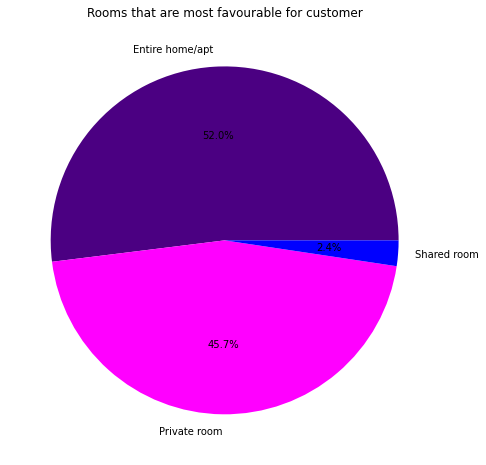

In [43]:
#Let's find out the popurality of room types among customers....

labels = airbnb_df['room_type'].value_counts().index
sizes = airbnb_df['room_type'].value_counts().values
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors = ['#4B0082','#FF00FF','#0000FF'] )
plt.title("Rooms that are most favourable for customer")

#Above fig speaks that 52% customers prefer to be in Entire home/apt followed by 45.7% prefers to take Private room and rest prefer to take shared room.

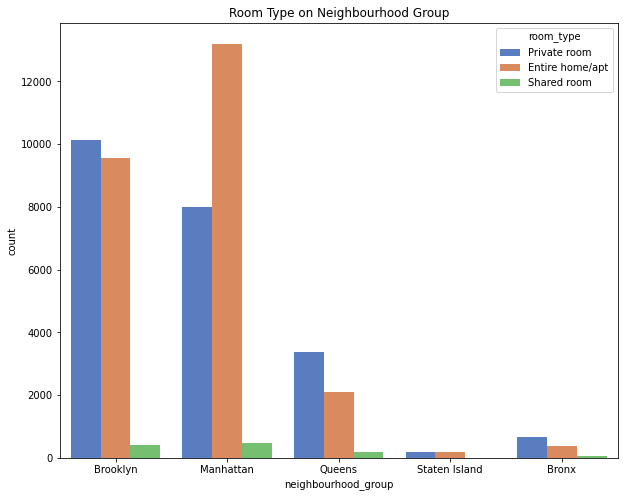

In [25]:
#Room type and most listed neighbourhood groups.....
plt.figure(figsize=(10,8))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type,palette='muted')
plt.show()

#Above plot help us to get the room types in neighbourhood. 
#Manhatten is having the highest number of room type of Entire Home/Apt followed by Brooklyn, Queens, Bronx and Staten island.
#Brooklyn is having the highest number of room type of private room followed by Manhatten, Queens, Bronx and Staten island.
#Manhatten is having the highest number of room type of Shared room followed by Brooklyn, Queens, Bronx.
#Staten Island having no Shared rooms.

In [28]:
#top 10 most reviewed listings in NYC!
top10_reviewed_listings= airbnb_df.nlargest(10,'reviews_per_month')
top10_reviewed_listings[['name','reviews_per_month','neighbourhood_group','price']]

,name,reviews_per_month,neighbourhood_group,price
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Manhattan,100
42076,Great Room in the heart of Times Square!,27.95,Manhattan,199
38870,Lou's Palace-So much for so little,20.94,Queens,45
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Queens,80
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Queens,50
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Queens,50
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Queens,48
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Queens,48
36238,“For Heaven Cakes”,15.78,Queens,75
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Queens,67


Text(0, 0.5, 'min stays')

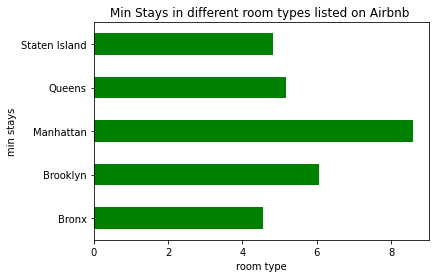

In [46]:
#The minimum stays of people in different types of room
airbnb_df.groupby('neighbourhood_group')['minimum_nights'].mean().plot(kind='barh',color='g')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('room type')
plt.ylabel('min stays')

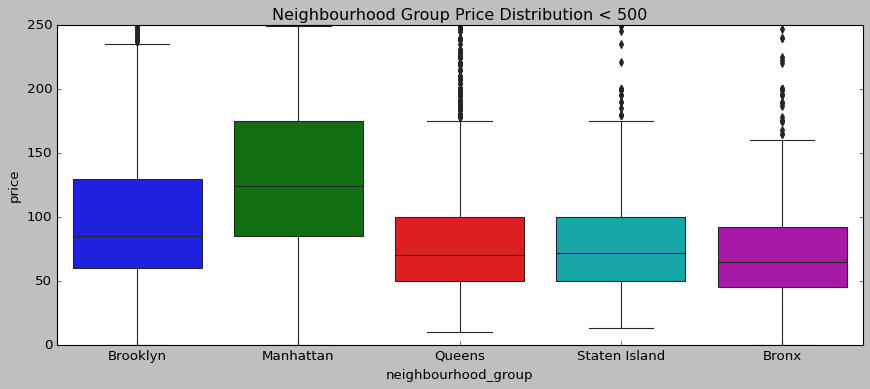

In [50]:
#highest range price for the listings 
plt.style.use('classic')
plt.figure(figsize=(13,5))
plt.title("Neighbourhood Group Price Distribution < 500")
sns.boxplot(y="price",x ='neighbourhood_group' ,data = airbnb_df[airbnb_df.price<250])
plt.show()

#From above boxplot We can state that
#Manhattan has the highest range price for the listings , followed by Brooklyn.Queens and Staten Island seem to have a very similar distribution, The Bronx is the cheapest.

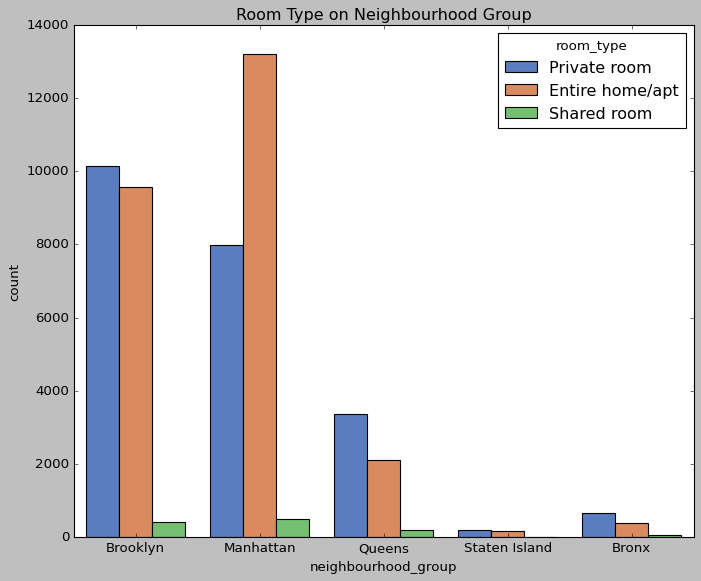

In [51]:
#Room type and most listed neighbourhood groups.....
plt.figure(figsize=(10,8))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(airbnb_df.neighbourhood_group,hue=airbnb_df.room_type,palette='muted')
plt.show()